In [1]:
import matplotlib.pyplot as plt
import matplotlib
import holoviews as hv
import pandas as pd
import numpy as np
import csv
from datetime import datetime

In [2]:
train=open('train.csv')
traincsv=csv.reader(train)

In [3]:
hora=[[0]*24,[0]*24]
modelo=[{},{}]
ip=[{},{}]

In [4]:
for row in traincsv:
    primeira=row
    print(row)
    break

['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time', 'is_attributed']


In [5]:
i=0
lista=[]
for row in traincsv:
    ip_temp=int(row[0])
    app_temp=int(row[1])
    modelo_temp=int(row[2])
    os_temp=int(row[3])
    channel_temp=int(row[4])
    click_time=datetime.strptime(row[5], '%Y-%m-%d %H:%M:%S')
    valor=int(row[7])
    if not ip_temp in ip[0]:
        ip[0][ip_temp]=0
        ip[1][ip_temp]=0
    if(not modelo_temp in modelo[0]):
        modelo[0][modelo_temp]=0
        modelo[1][modelo_temp]=0
    hora[valor][click_time.hour]+=1
    ip[valor][ip_temp]+=1
    modelo[valor][modelo_temp]+=1
    #lista.append(row)
    i+=1
    if(i==1000000):
        print(row[5])
        break


2017-11-06 16:21:51


In [6]:
hora=pd.DataFrame({'Falso':hora[0],'Verdadeiro':hora[1]})

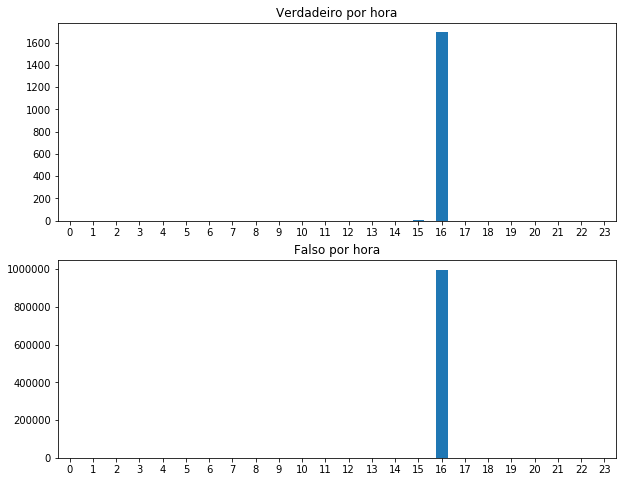

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
hora['Verdadeiro'].plot(kind='bar', rot=0, ax=axes[0], title='Verdadeiro por hora',legend=False)
hora['Falso'].plot(kind='bar', rot=0, ax=axes[1], title='Falso por hora',legend=False)
plt.show()

In [8]:
ipdataframe0=pd.DataFrame.from_dict(ip[0],orient='index')
ipdataframe0.columns=['False']
ipdataframe1=pd.DataFrame.from_dict(ip[1],orient='index')
ipdataframe1.columns=['True']
ipdataframe=pd.concat([ipdataframe0,ipdataframe1], axis=1)
ipdataframe=ipdataframe.sort_index()

In [9]:
ipdataframe['Clicks']=ipdataframe['True']+ipdataframe['False']
ipdataframe['TruePerCent']=ipdataframe['True']/ipdataframe['Clicks']
ipdataframe=ipdataframe.sort_values('Clicks',ascending=False)

In [10]:
ipdataframe

,False,True,Clicks,TruePerCent
73487,6432,5,6437,0.000777
73516,6313,4,6317,0.000633
105560,3472,2,3474,0.000576
5314,3367,0,3367,0.000000
5348,3053,4,3057,0.001308
53454,3038,0,3038,0.000000
105475,2871,1,2872,0.000348
100275,2813,2,2815,0.000710
201182,2804,3,2807,0.001069
114276,2782,0,2782,0.000000
